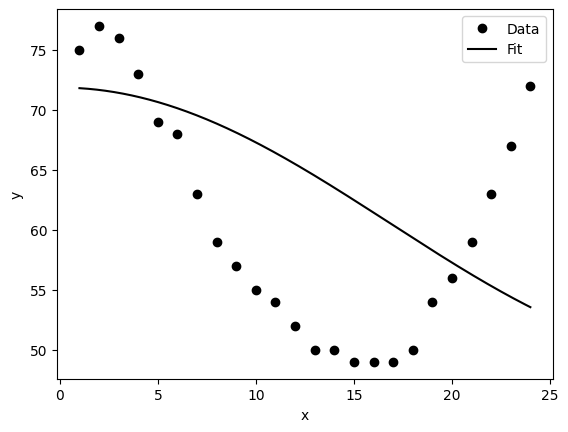

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Define x and y
x = np.arange(1, 25)
y = np.array([75, 77, 76, 73, 69, 68, 63, 59, 57, 55, 54, 52, 50,
              50, 49, 49, 49, 50, 54, 56, 59, 63, 67, 72])

m = 1000  # number of generations
n = 80   # number of trials
n2 = 40  # number of trials to be kept

# Initialize arrays A, B, C
A = 12 + np.random.randn(n, 1)
B = np.pi / 12 + np.random.randn(n, 1)
C = 60 + np.random.randn(n, 1)

for jgen in range(m):
    # Evaluate objective function
    E = np.zeros(n)
    for j in range(n):
        E[j] = np.sum((A[j] * np.cos(B[j] * x) + C[j] - y) ** 2)
    
    # Sort from small to large
    Ej_sorted = np.argsort(E)
    Ej = Ej_sorted[:n2]

    # Get best n2 solutions
    Ak1 = A[Ej]
    Bk1 = B[Ej]
    Ck1 = C[Ej]

    # Generate n2 new mutations
    Ak2 = Ak1 + np.random.randn(n2, 1) 
    Bk2 = Bk1 + np.random.randn(n2, 1) 
    Ck2 = Ck1 + np.random.randn(n2, 1) 

    # Group new n gueses
    A = np.concatenate((A[:n2], Ak2))
    B = np.concatenate((B[:n2], Bk2))
    C = np.concatenate((C[:n2], Ck2))

# Generate data for plotting
xx = np.arange(1, 24.01, 0.01)
yfit = (A[0] * np.cos(B[0] * xx) + C[0]).flatten()

# Plot the data and the fit
plt.plot(x, y, 'ko', label='Data')
plt.plot(xx, yfit, 'k-', label='Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



In [34]:
import numpy as np
from scipy.optimize import differential_evolution

def fit_line(x):
    xx = np.arange(1, 25)
    yy = np.array([75, 77, 76, 73, 69, 68, 63, 59, 57, 55, 54, 52,
                   50, 50, 49, 49, 49, 50, 54, 56, 59, 63, 67, 72])
    E = np.sum((x[0] * np.cos(x[1] * xx) + x[2] - yy) ** 2)
    return E

# Define bounds for the parameters
lower = [10, np.pi/20, 50]
upper = [15, np.pi/4, 70]

# Perform optimization using genetic algorithm
result = differential_evolution(fit_line, bounds=list(zip(lower, upper)))

print("Optimal parameters:", result.x)


Optimal parameters: [14.61218437  0.21453597 62.98773611]
